# Baseline Incentives Simulation - EDA

In [58]:
import sys
sys.path.append('../')

In [59]:
import pandas as pd
import os


file = os.listdir('../data/simulations')[0]
data_path = f"../data/simulations/{file}"
raw_df = pd.read_pickle(data_path, compression='gzip')

dfs = [raw_df,
       raw_df.reward.map(lambda x: x.__dict__).apply(pd.Series),
       raw_df.network_power_scenario.map(lambda x: x.__dict__).apply(pd.Series)]

DROP_COLS = ['reward', 'network_power_scenario']

df = (pd.concat(dfs,
                axis=1)
      .drop(columns=DROP_COLS)
      #.dropna()
      .set_index('days_passed')
      .assign(block_reward=lambda x: x.simple_reward + x.baseline_reward)
      .assign(marginal_reward=lambda x: x.block_reward / x.network_power)
      )


<AxesSubplot:xlabel='days_passed'>

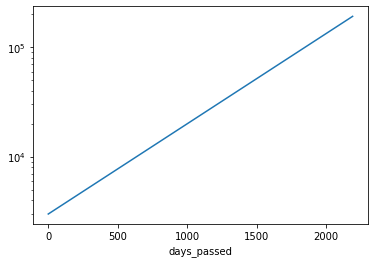

In [60]:
df.network_power.plot(logy=True)

<AxesSubplot:xlabel='days_passed'>

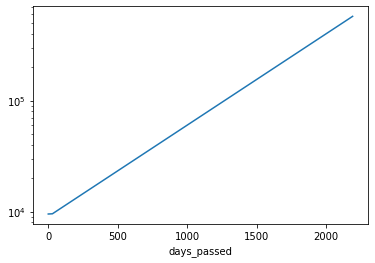

In [61]:
df.baseline.plot(logy=True)

In [62]:
df

,delta_days,network_power,baseline,cumm_capped_power,effective_network_time,simulation,subset,run,timestep,timestep_in_days,...,cross_down_after_beginning,stable_after_cross_down,take_off_after_stable,steady_after_take_off,growth_cross_down,growth_stable,growth_take_off,growth_steady,block_reward,marginal_reward
days_passed,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,3000.000000,9500.000000,6000.000000,1.000000,0,0,1,0,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,NaN,NaN
30.0,30.0,3175.751494,9546.134995,6260.842012,1.323463,0,0,1,1,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,9.078193e+08,285859.693550
60.0,30.0,3361.799183,10105.384156,6536.965148,1.361169,0,0,1,2,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,3.134943e+07,9325.193363
90.0,30.0,3558.746259,10697.396277,6829.264635,1.400039,0,0,1,3,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.062724e+06,1422.614391
120.0,30.0,3767.231250,11324.090735,7138.688147,1.440076,0,0,1,4,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,4.344609e+06,1153.263147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070.0,30.0,152462.817284,458294.875508,227825.607950,5.799095,0,0,1,69,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.230179e+06,34.304620
2100.0,30.0,161394.673244,485143.545158,241081.843945,5.879262,0,0,1,70,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.189271e+06,32.152679
2130.0,30.0,170849.791546,513565.112741,255114.681033,5.959537,0,0,1,71,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.148228e+06,30.133066


In [63]:
df

,delta_days,network_power,baseline,cumm_capped_power,effective_network_time,simulation,subset,run,timestep,timestep_in_days,...,cross_down_after_beginning,stable_after_cross_down,take_off_after_stable,steady_after_take_off,growth_cross_down,growth_stable,growth_take_off,growth_steady,block_reward,marginal_reward
days_passed,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,3000.000000,9500.000000,6000.000000,1.000000,0,0,1,0,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,NaN,NaN
30.0,30.0,3175.751494,9546.134995,6260.842012,1.323463,0,0,1,1,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,9.078193e+08,285859.693550
60.0,30.0,3361.799183,10105.384156,6536.965148,1.361169,0,0,1,2,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,3.134943e+07,9325.193363
90.0,30.0,3558.746259,10697.396277,6829.264635,1.400039,0,0,1,3,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.062724e+06,1422.614391
120.0,30.0,3767.231250,11324.090735,7138.688147,1.440076,0,0,1,4,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,4.344609e+06,1153.263147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070.0,30.0,152462.817284,458294.875508,227825.607950,5.799095,0,0,1,69,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.230179e+06,34.304620
2100.0,30.0,161394.673244,485143.545158,241081.843945,5.879262,0,0,1,70,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.189271e+06,32.152679
2130.0,30.0,170849.791546,513565.112741,255114.681033,5.959537,0,0,1,71,30,...,365.25,365.25,365.25,365.25,1.0,1.0,1.0,1.0,5.148228e+06,30.133066
